# -:TWITTER SENTIMENT ANALYSIS USING ML:-

# Importing Libraries

In [1]:
import numpy as np
import GetOldTweets3 as got
import pandas as pd

#### NLP Preprocessing libraries

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [64]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#### To visualize the data in the project

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib notebook

In [4]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer

### Word2vec

In [5]:
import gensim
from gensim.models.word2vec import Word2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import train_test_split

checking the versions

In [7]:
print(matplotlib.__version__)
print(sns.__version__)
print(got.__version__)
print(np.__version__)
print(pd.__version__)
print(nltk.__version__)

3.0.2
0.9.0
0.0.11
1.15.4
0.23.4
3.4


#### Working Directry

In [2]:
pwd

'C:\\Users\\shashi kumar\\Project'

#### Real time conection

In [ ]:
# Function the pulls tweets from a specific username and turns to csv file

# Parameters: (list of twitter usernames), (max number of most recent tweets to pull from)
def text_query_to_csv(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    user_tweets = [[tweet.id, tweet.date,tweet.username,tweet.text] for tweet in tweets]

    # Creation of dataframe from tweets list
    tweets_df = pd.DataFrame(user_tweets, columns = ['id','timestamp','username','tweet_text'])

    # Converting dataframe to CSV
    tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query, int(count/1000)), sep=',')

## Data Extraction

In [3]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
text_query = 'CAA_NRC'
count = 100000

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

### data store

In [9]:
df = pd.read_csv("CAA_NRC.csv", encoding='latin-1', header=None)

In [10]:
df.count()
df.head(5)

,0,1,2,3,4
0,NaN,id,timestamp,username,tweet_text
1,0.0,1230608322862206976,2020-02-20 21:41:02+00:00,DIL_HIDILMAI,à¤¹à¤° à¤¹à¤° à¤®à¤¹à¤¾à¤¦à¥à¤µ à¤¹à¤° à¤¹à¤°...
2,1.0,1230607999191805952,2020-02-20 21:39:45+00:00,Sundar_Ind,"Real intention is ""Cheen ke lenge Azaadi "" Wit..."
3,2.0,1230607960335933452,2020-02-20 21:39:35+00:00,IamSYD6,Mr @POTUS as of Today The regional Issues of #...
4,3.0,1230606504060784640,2020-02-20 21:33:48+00:00,ShaikFa95306435,Perhaps we respect it that's the reason we are...


In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.columns = ["snum","id","date",'user',"text"] 

In [13]:
df.isnull().sum()

snum       1
id         0
date       0
user       0
text    1178
dtype: int64

In [14]:
df.duplicated().sum()


0

### Pre_processing STEPS:

In [15]:
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '')

In [16]:
# Missing Values
num_missing_desc = df.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
df = df.dropna()

Number of missing values: 0


In [17]:
TAG_CLEANING_RE = "@\S+"
# Remove @tags
df['text'] = df['text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))


In [18]:
# Smart lowercase
df['text'] = df['text'].map(lambda x: x.lower())

In [19]:
# Remove numbers
df['text'] = df['text'].map(lambda x: re.sub(r'\d+', ' ', x))


In [20]:
# Remove words which is less then 3
df['text'] = df['text'].map(lambda x: re.sub(r'\b\w{1,3}\b', ' ', x))

In [21]:
# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
df['text'] = df['text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))

In [22]:
df.head(5)

,snum,id,date,user,text
0,11665.0,1230045203974803456,2020-02-19 08:23:24+00:00,darpanban,
1,63661.0,1226809035862659072,2020-02-10 10:04:01+00:00,asif343,reservation
2,22010.0,1229373492795019264,2020-02-17 11:54:15+00:00,neerajchawla82,kindly dont show your muslim identity while c...
3,8465.0,1230164959495151616,2020-02-19 16:19:16+00:00,Aaaru_Prem,
4,76534.0,1225831891820929025,2020-02-07 17:21:12+00:00,NAEEM97754593,protest against bhilwara rajasthan


In [23]:
# Remove Punctuation
df['text']  = df['text'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [24]:
# Remove white spaces
df['text'] = df['text'].map(lambda x: x.strip())

In [25]:
# Tokenize into words(matrix type)
df['text'] = df['text'].map(lambda x: word_tokenize(x))

In [26]:
# Remove non alphabetic tokens
df['text'] = df['text'].map(lambda x: [word for word in x if word.isalpha()])

In [27]:
# Filter out stop words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].map(lambda x: [w for w in x if not w in stop_words])

In [28]:
# Word Lemmatization
lem = WordNetLemmatizer()
df['text'] = df['text'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

In [29]:
df.head(5)

,snum,id,date,user,text
0,11665.0,1230045203974803456,2020-02-19 08:23:24+00:00,darpanban,[]
1,63661.0,1226809035862659072,2020-02-10 10:04:01+00:00,asif343,[reservation]
2,22010.0,1229373492795019264,2020-02-17 11:54:15+00:00,neerajchawla82,"[kindly, dont, show, muslim, identity, claim, ..."
3,8465.0,1230164959495151616,2020-02-19 16:19:16+00:00,Aaaru_Prem,[]
4,76534.0,1225831891820929025,2020-02-07 17:21:12+00:00,NAEEM97754593,"[protest, bhilwara, rajasthan]"


In [30]:
# Turn lists back to string
df['text'] = df['text'].map(lambda x: ' '.join(x))

In [31]:
df.head(5)

,snum,id,date,user,text
0,11665.0,1230045203974803456,2020-02-19 08:23:24+00:00,darpanban,
1,63661.0,1226809035862659072,2020-02-10 10:04:01+00:00,asif343,reservation
2,22010.0,1229373492795019264,2020-02-17 11:54:15+00:00,neerajchawla82,kindly dont show muslim identity claim reserva...
3,8465.0,1230164959495151616,2020-02-19 16:19:16+00:00,Aaaru_Prem,
4,76534.0,1225831891820929025,2020-02-07 17:21:12+00:00,NAEEM97754593,protest bhilwara rajasthan


In [32]:
df = df.drop(["snum","id", "date", "user"], axis = 1) 

In [33]:
df.duplicated().sum()

42778

In [34]:
#Remove duplicate
df=df.drop_duplicates(subset=None, keep=False,inplace=False)

In [35]:
df.duplicated().sum()

0

In [36]:
df.count()

text    52376
dtype: int64

In [37]:
df['pre_clean_len'] = [len(t) for t in df.text]

# Finding outliers using Box plot using pre_clean_len column

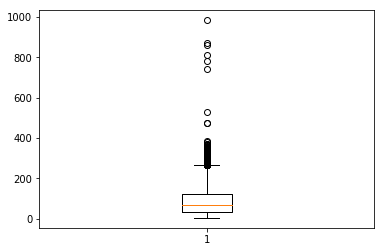

In [38]:
fig=plt.figure()
plt.boxplot(df.pre_clean_len)
plt.show()

In [39]:
df.head(5)

,text,pre_clean_len
2,kindly dont show muslim identity claim reserva...,175
4,protest bhilwara rajasthan,26
5,tukalogalge article mandir triple talaq bill s...,196
6,dear resign swine weareallmuslim weareone caa ...,164
7,caa nrc protest caa nrcprotests nasty shud jai...,88


In [40]:
#df['text'].dropna(axis=0,how='any',thresh=None,inplace=False)

## Sentiment_Polarity

In [41]:
from textblob import TextBlob
df = df[[ 'text']].sample(52376)
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df.text.apply(detect_polarity)
df.head(20)

,text,polarity
57733,karan anger good think troll actually days tre...,0.000000
51143,point raise national issue like rashtravaad st...,0.000000
68831,womenreject caa nrc npr ultimate epitome patri...,-0.333333
20598,everything fine read signal time change strate...,0.036190
95133,poonam lado sbse pyari sister bolte hmar mere ...,-0.500000
3255,imame hussain reject caa nrc tahir madni,0.000000
57087,conference expose miserable condition indian m...,-1.000000
61770,people raise anti protest right protest marath...,0.285714
74513,first lady cordially invite shaheen bagh visit...,0.250000
86035,theek agale india trip pukka,0.000000


In [42]:
#df.sample(replace=False)
#import dask.dataframe as dd
#ddf=dd.from_pandas(df,npartitions=1)
#ddf.sample(frac=2, replace=True).compute()

##### conver into proper sentiment level 0,1 and -1 

In [43]:
df['polarity']=df['polarity'].map(lambda x: 1 if x > 0.25 else -1 if x < -0.25 else 0)
df.head()

,text,polarity
57733,karan anger good think troll actually days tre...,0
51143,point raise national issue like rashtravaad st...,0
68831,womenreject caa nrc npr ultimate epitome patri...,-1
20598,everything fine read signal time change strate...,0
95133,poonam lado sbse pyari sister bolte hmar mere ...,-1


# Data visualizing

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


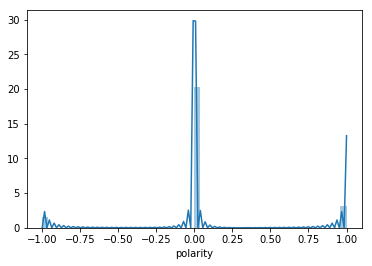

In [44]:
fig=plt.figure()
sns.distplot(df['polarity'])

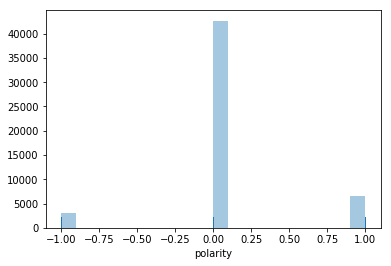

In [45]:
fig=plt.figure()
sns.distplot(df['polarity'],bins=20,kde=False,rug=True);

# Word2vec

In [46]:
Vec=df["text"].values
Vec

array(['karan anger good think troll actually days trend misunderstand account newbie',
       'point raise national issue like rashtravaad state election definitely work state elections different isliye state elections liye ranneeti badni hogi state elections jeetne liye state issue focus karna hoga',
       'womenreject caa nrc npr ultimate epitome patriarchy twitter decide percent country population want decide choices go undemocratic also sheer misogynistic pathetic',
       ..., 'wahi bola maine discount wala tweet kiya',
       'women solidarity yatra protest sit delhi secular inclusive india caa nrc protest reject caa nrc npr',
       'call islamist love nature human allah caa nrc protest indian'],
      dtype=object)

In [47]:
Main_Vec = [nltk.word_tokenize(text) for text in Vec]

In [48]:
Main_Vec

[['karan',
  'anger',
  'good',
  'think',
  'troll',
  'actually',
  'days',
  'trend',
  'misunderstand',
  'account',
  'newbie'],
 ['point',
  'raise',
  'national',
  'issue',
  'like',
  'rashtravaad',
  'state',
  'election',
  'definitely',
  'work',
  'state',
  'elections',
  'different',
  'isliye',
  'state',
  'elections',
  'liye',
  'ranneeti',
  'badni',
  'hogi',
  'state',
  'elections',
  'jeetne',
  'liye',
  'state',
  'issue',
  'focus',
  'karna',
  'hoga'],
 ['womenreject',
  'caa',
  'nrc',
  'npr',
  'ultimate',
  'epitome',
  'patriarchy',
  'twitter',
  'decide',
  'percent',
  'country',
  'population',
  'want',
  'decide',
  'choices',
  'go',
  'undemocratic',
  'also',
  'sheer',
  'misogynistic',
  'pathetic'],
 ['everything',
  'fine',
  'read',
  'signal',
  'time',
  'change',
  'strategy',
  'handlers',
  'shaheenabagh',
  'prove',
  'smart',
  'strategists',
  'anti',
  'caa',
  'nrc',
  'npr',
  'protest',
  'handle',
  'complete',
  'mess',
  'n

In [49]:
from gensim.models.word2vec import Word2Vec
model=Word2Vec(Main_Vec,min_count=1,size=32)

In [50]:
model.most_similar('support')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('oppose', 0.8770150542259216),
 ('favour', 0.860221803188324),
 ('unity', 0.8586062788963318),
 ('bengalihindu', 0.8550029993057251),
 ('strongly', 0.8547118902206421),
 ('uniformcivilcode', 0.8488487005233765),
 ('aginst', 0.8487179279327393),
 ('jaishreeram', 0.8483953475952148),
 ('populationcontrolbill', 0.8460009098052979),
 ('prabhati', 0.8459258675575256)]

In [51]:
model.most_similar('india')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('democracy', 0.9422683715820312),
 ('divisive', 0.9294857382774353),
 ('article', 0.9218499064445496),
 ('unite', 0.9186652302742004),
 ('discriminatory', 0.9122859239578247),
 ('assam', 0.9079166054725647),
 ('hostage', 0.9055929183959961),
 ('primarily', 0.9035006165504456),
 ('rajinikanth', 0.9026079773902893),
 ('save', 0.9013148546218872)]

# COUNT CLASSIFIERS

In [52]:
X = df.text # get all the text in x variable
y = df.polarity # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y
from collections import Counter
print(set(y)) # equals to list(set(words))
print(Counter(y).values()) #

(52376,)
(52376,)
{0, 1, -1}
dict_values([42658, 3137, 6581])


# APPLYING TRAIN AND TEST SPLIT

In [53]:
#from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1,stratify=y) # split the data into traing and testing set where ratio is 80:20
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 41900
TEST size: 10476


In [54]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))

## Fit or training data tweets to vect

In [55]:
vect.fit(X_train) 
X_train_dtm = vect.transform(X_train) 

transform our testing data tweets

In [56]:
X_test_dtm = vect.transform(X_test)

# SUPPORT VECTOR MACHINE (SVM) ALGORITHMS

In [57]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [58]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [59]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8808353709929577

In [60]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [61]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.9129438717067583

### confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[ 376,  249,    3],
       [ 146, 8133,  253],
       [   1,  260, 1055]], dtype=int64)

# Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [64]:
nb.fit(X_train_dtm, y_train)# fit our both training data tweets as well as their sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [65]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8144630343538596

predict the sentiments of testing data tweets

In [66]:
y_pred_nb = nb.predict(X_test_dtm)

measure the accuracy of our model on the testing data

In [67]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) 

0.8144329896907216

### confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb)

array([[   0,  628,    0],
       [   0, 8532,    0],
       [   0, 1316,    0]], dtype=int64)

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=5)

In [70]:
clf_dtc.fit(X_train_dtm, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [71]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_dtc, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.8334369477966271

In [72]:
y_pred_dtc = clf_dtc.predict(X_test_dtm)

In [73]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_dtc) 

0.8334287896143566

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dtc)

array([[   0,  628,    0],
       [   0, 8461,   71],
       [   0, 1046,  270]], dtype=int64)

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier  
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [76]:
clf_knn.fit(X_train_dtm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_knn, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.8453220084856777

In [78]:
y_pred_knn = clf_knn.predict(X_test_dtm)

In [79]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_knn) 

0.8472699503627339

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[ 102,  524,    2],
       [  37, 8407,   88],
       [   3,  946,  367]], dtype=int64)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [82]:
clf_rf.fit(X_train_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [84]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_rf, X = X_train_dtm, y = y_train, cv = 4)
accuracies.mean()

0.8873031694260466

In [85]:
y_pred_rf = clf_rf.predict(X_test_dtm)

In [86]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_rf)

0.8942344406261932

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[ 284,  342,    2],
       [  97, 8232,  203],
       [   0,  464,  852]], dtype=int64)

## Finished

In [62]:
#model = keyedvectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True,limit=100000)

In [63]:
#!pip install keyedvectors from gensim